# This is the playground, where everything can happen, but nothing must happen!

In [1]:
from psaw import PushshiftAPI
import requests
import json
import csv
api = PushshiftAPI()

In [2]:
gen = api.search_submissions(limit=100)
results = list(gen)

/Users/stefanwinter/Library/Python/3.7/lib/python/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [6]:
# Convert date to unix timestampe

import time
import datetime

def convert_time_to_unix(START, END):
    start = int(time.mktime(datetime.datetime.strptime(START, "%d/%m/%Y").timetuple()))
    end = int(time.mktime(datetime.datetime.strptime(END, "%d/%m/%Y").timetuple()))

    return start, end

#    print("Start: {} -> {}".format(START, start))
#    print("End: {} -> {}".format(END, end))

# Pushshift Params  
size — increase limit of returned entries to 1000  
after — where to start the search  
before — where to end the search  
title — to search only within the submission’s title  
subreddit — to narrow it down to a particular subreddit  

In [7]:
def collectSubData(subm):
    subData = list() #list to store data points
    title = subm['title']
    url = subm['url']
    try:
        flair = subm['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = subm['author']
    sub_id = subm['id']
    score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    numComms = subm['num_comments']
    permalink = subm['permalink']
    
    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair))
    subStats[sub_id] = subData

In [22]:
START = "01/09/2021"
END = datetime.datetime.now().strftime("%d/%m/%Y") #today

#Subreddit to query
sub='wallstreetbets'
#before and after dates
after, before = convert_time_to_unix(START, END)
print(after, before)
query = "gme"
subCount = 0
subStats = {}

1630447200 1631138400


In [2]:
def getPushshiftData(query, after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

In [4]:
getPushshiftData("gme", 1630447200, 1632261600, "wallstreetbets")

https://api.pushshift.io/reddit/search/submission/?title=gme&size=1000&after=1630447200&before=1632261600&subreddit=wallstreetbets


NameError: name 'requests' is not defined

In [24]:
data = getPushshiftData(query, after, before, sub)
# Will run until all posts have been gathered 
# from the 'after' date up until before date
while len(data) > 0:
    for submission in data:
        collectSubData(submission)
        subCount+=1
    # Calls getPushshiftData() with the created date of the last submission
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    after = data[-1]['created_utc']
    data = getPushshiftData(query, after, before, sub)
    
print(len(data))

https://api.pushshift.io/reddit/search/submission/?title=gme&size=1000&after=1630447200&before=1631138400&subreddit=wallstreetbets
100
2021-09-04 20:36:34
https://api.pushshift.io/reddit/search/submission/?title=gme&size=1000&after=1630780594&before=1631138400&subreddit=wallstreetbets
55
2021-09-08 07:17:25
https://api.pushshift.io/reddit/search/submission/?title=gme&size=1000&after=1631078245&before=1631138400&subreddit=wallstreetbets
0


In [28]:
print(str(len(subStats)) + " submissions have added to list")
print("1st entry is:")
print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
print("Last entry is:")
print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

155 submissions have added to list
1st entry is:
I'm setting my sell limit high for GME so Robinhood can't give it to short sellers at current pricing....as I was told this was the way? Anyway, what dafuq is going on here? I don't want to hear about how bad RH is. I know. But I'm not cashing out and losing money. Well screw that. Any thoughts? created: 2021-09-01 00:15:06
Last entry is:
Since some of you think you’ll pull some magic out your ass and revive gme created: 2021-09-08 07:17:25


In [45]:
def updateSubs_file():
    upload_count = 0
    location = "data/"
    print("input filename of submission file, please add .csv")
    filename = input()
    file = location + filename
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["Post ID","Title","Url","Author","Score","Publish Date","Total No. of Comments","Permalink","Flair"]
        a.writerow(headers)
        for sub in subStats:
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")
updateSubs_file()

input filename of submission file, please add .csv
155 submissions have been uploaded


In [14]:
## Using the pmaw pushshift api wrapper
# https://medium.com/swlh/how-to-scrape-large-amounts-of-reddit-data-using-pushshift-1d33bde9286

In [24]:
import pandas as pd
from pmaw import PushshiftAPI
import datetime as dt

api = PushshiftAPI()

In [9]:
START = "01/09/2021"
END = datetime.datetime.now().strftime("%d/%m/%Y") #today

#Subreddit to query
subreddit = 'wallstreetbets'
#before and after dates
after, before = convert_time_to_unix(START, END)
print(after, before)
query = "gme"
subCount = 0
subStats = {}

1630447200 1631224800


In [96]:
# Submissions
subreddit="wallstreetbets"
limit=1000
submissions = api.search_submissions(subreddit=subreddit, q = "gme", before=before, after=after, mem_safe=True, safe_exit=True)
print(f'Retrieved {len(submissions)} comments from Pushshift')

Response cache key: d4780f3a8295132fb947e64afac8469f
337 result(s) available in Pushshift
Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 337 comments from Pushshift


In [97]:
submissions_df = pd.DataFrame(submissions)

In [98]:
print(submissions_df.columns)

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_sub

In [83]:
# Retrieve comments by submission id

submission_ids = list(submissions_df["id"])

c = api.search_submission_comment_ids(ids = submission_ids[:10])

c_df = pd.DataFrame(c)

Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0


In [87]:
submissions_df["score"]

0      1
1      1
2      1
3      1
4      1
      ..
332    1
333    1
334    1
335    1
336    1
Name: score, Length: 337, dtype: int64

In [85]:
print(submission_ids[:10])
print(c_df)

['pg0759', 'pg0249', 'pfzgt2', 'pfxslq', 'pfxdnj', 'pfx9de', 'pfx74v', 'pfwgby', 'pfwff1', 'pfwdi4']
          0
0   hb7g632
1   hb7x8cy
2   hb7s0n3
3   hb7w7ie
4   hb7d844
5   hb7dfbi
6   hb7cgto
7   hb7bvs7
8   hb7c2xb
9   hb76e2g
10  hb76guy
11  hb76wp1
12  hb77l86
13  hb780th
14  hb784hr
15  hb787o0
16  hb7889o
17  hb78pam
18  hb79284
19  hb7a0az
20  hb7f9zs
21  hb7t763
22  hb767e9
23  hb75vhf


In [75]:
print("First ten submission ids: \n", submission_ids[:10])
c_df = pd.DataFrame(c)
print(c_df)

First ten submission ids: 
 ['pg0759', 'pg0249', 'pfzgt2', 'pfxslq', 'pfxdnj', 'pfx9de', 'pfx74v', 'pfwgby', 'pfwff1', 'pfwdi4']
          0
0   hb7s0n3
1   hb7w7ie
2   hb7x8cy
3   hb7g632
4   hb7d844
5   hb7dfbi
6   hb7cgto
7   hb7bvs7
8   hb7c2xb
9   hb76e2g
10  hb76guy
11  hb76wp1
12  hb77l86
13  hb780th
14  hb784hr
15  hb787o0
16  hb7889o
17  hb78pam
18  hb79284
19  hb7a0az
20  hb7f9zs
21  hb7t763
22  hb767e9
23  hb75vhf


In [53]:
# Search for all Comments
subreddit="wallstreetbets"
limit=1000
comments = api.search_comments(subreddit=subreddit, q = "gme", limit=limit, before=before, after=after)
print(f'Retrieved {len(comments)} comments from Pushshift')

Total:: Success Rate: 100.00% - Requests: 10 - Batches: 1 - Items Remaining: 0
Retrieved 1000 comments from Pushshift


In [54]:
comments_df = pd.DataFrame(comments)

In [55]:
print(comments_df.columns)

Index(['all_awardings', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'collapsed_because_crowd_control', 'collapsed_reason_code',
       'comment_type', 'created_utc', 'gildings', 'id', 'is_submitter',
       'link_id', 'locked', 'no_follow', 'parent_id', 'permalink',
       'retrieved_on', 'score', 'send_replies', 'stickied', 'subreddit',
       'subreddit_id', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'archived', 'body_sha1', 'can_gild', 'collapsed',
       'collapsed_reason', 'controversiality', 'distinguished', 'gilded',
       'retrieved_utc', 'score_hidden', 'subreddit_name_prefixed',
       'subreddit_type', 'media_metadata', 'author_cakeday'],
      dtype='object')


In [1]:
# Create venv: python3 -m venv .name
# Activate: source .name/bin/activate
# Install requirements: pip3 install -r ./patch/requirements.txt
# Show: pip3 list
# Update requirements.txt: pip3 freeze > requirements.txt

# Load Data from yahoo finance

In [3]:
import yfinance as yf

In [7]:
gme = yf.download("GME", start = "2020-01-01", end = "2021-09-29")

[*********************100%***********************]  1 of 1 completed


In [8]:
gme

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,6.080000,6.390000,5.990000,6.080000,6.080000,4322600
2020-01-02,6.140000,6.470000,6.070000,6.310000,6.310000,4453600
2020-01-03,6.210000,6.250000,5.840000,5.880000,5.880000,3543900
2020-01-06,5.800000,5.910000,5.600000,5.850000,5.850000,3394800
2020-01-07,5.770000,5.830000,5.440000,5.520000,5.520000,5228000
...,...,...,...,...,...,...
2021-09-22,189.639999,193.500000,186.289993,190.139999,190.139999,2256600
2021-09-23,192.330002,195.750000,190.600006,191.240005,191.240005,1682300
2021-09-24,191.000000,191.720001,184.110001,185.160004,185.160004,1679900


In [9]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


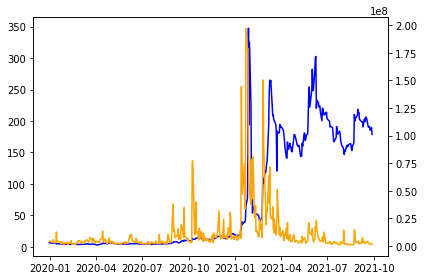

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(gme["Adj Close"], color = "blue")
ax2 = ax1.twinx()
ax2.plot(gme["Volume"], color = "orange")

fig.tight_layout()
plt.show()